In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
dataset = pd.read_excel(r"C:\Users\user\Downloads\Copy of loan.xlsx")
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Analyzing the data

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
#Relationship between credit history and loan eligibility
#Individuals with a credit history of 1 are more likely to receive a loan
pd.crosstab(dataset['Credit_History'], dataset['Loan_Status'], margins = True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


<AxesSubplot:>

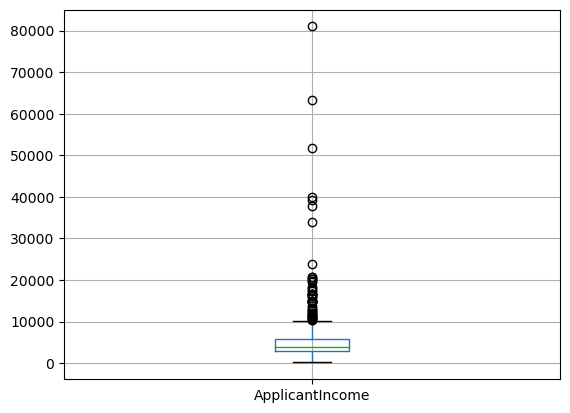

In [7]:
#Presence of outliers
dataset.boxplot(column = 'ApplicantIncome')

<AxesSubplot:>

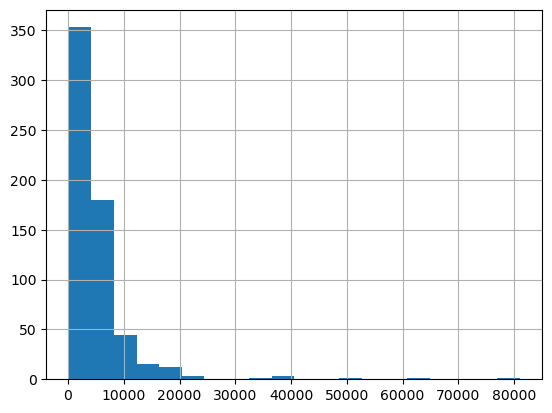

In [8]:
#Data is right skewed hence the values need to be normalised
dataset['ApplicantIncome'].hist(bins = 20)

<AxesSubplot:>

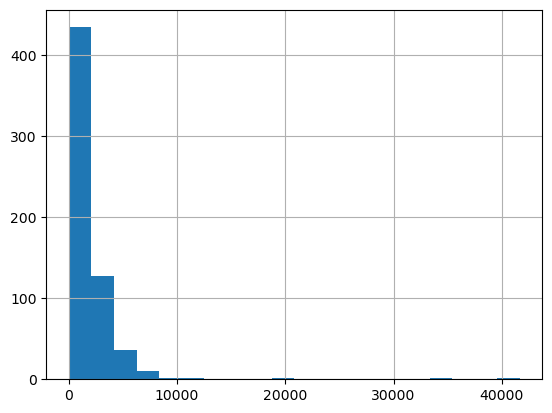

In [9]:
#Data is right skewed hence the values need to be normalised
dataset['CoapplicantIncome'].hist(bins = 20)

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Education'>

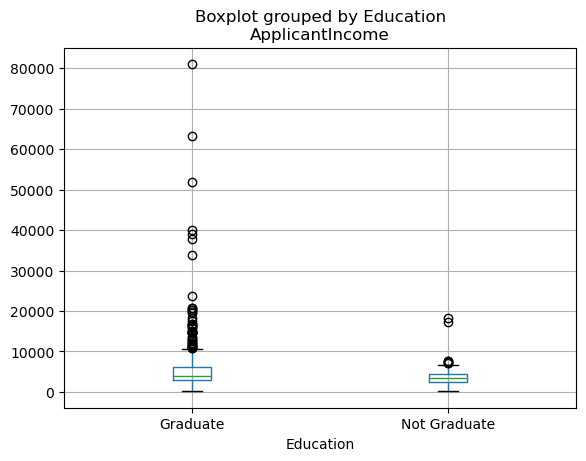

In [10]:
#Relationship between education and applicant income
dataset.boxplot(column = 'ApplicantIncome', by = 'Education')

<AxesSubplot:>

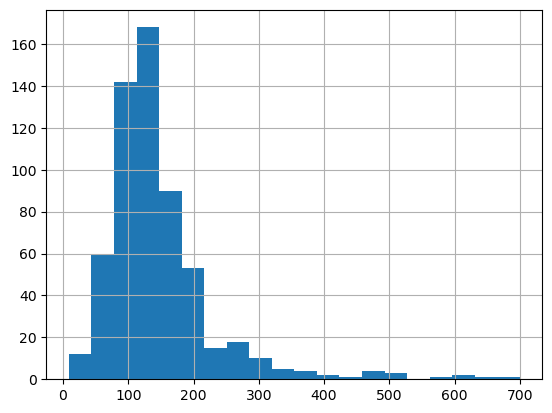

In [11]:
#Data is right skewed
dataset['LoanAmount'].hist(bins = 20)

<AxesSubplot:>

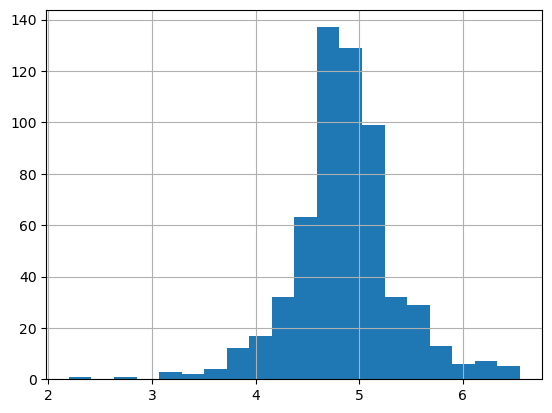

In [12]:
#Normalizing the Loan Amount variable
dataset['LoanAmount_log'] = np.log(dataset['LoanAmount'])
dataset['LoanAmount_log'].hist(bins = 20)

In [13]:
#Filling in missing values
dataset['Gender'].fillna(dataset['Gender'].mode()[0],inplace = True)
dataset['Married'].fillna(dataset['Married'].mode()[0],inplace = True)
dataset['Dependents'].fillna(dataset['Dependents'].mode()[0],inplace = True)
dataset['Self_Employed'].fillna(dataset['Self_Employed'].mode()[0],inplace = True)
dataset.LoanAmount = dataset['LoanAmount'].fillna(dataset['LoanAmount'].mean())
dataset['Loan_Amount_Term'].fillna(dataset['Loan_Amount_Term'].mode()[0],inplace = True)
dataset['Credit_History'].fillna(dataset['Credit_History'].mode()[0],inplace = True)
dataset.LoanAmount_log = dataset['LoanAmount_log'].fillna(dataset['LoanAmount_log'].mean())

In [14]:
dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
dtype: int64

In [15]:
dataset['TotalIncome'] = dataset['ApplicantIncome'] + dataset['CoapplicantIncome']
dataset['TotalIncome_log'] = np.log(dataset['TotalIncome'])

<AxesSubplot:>

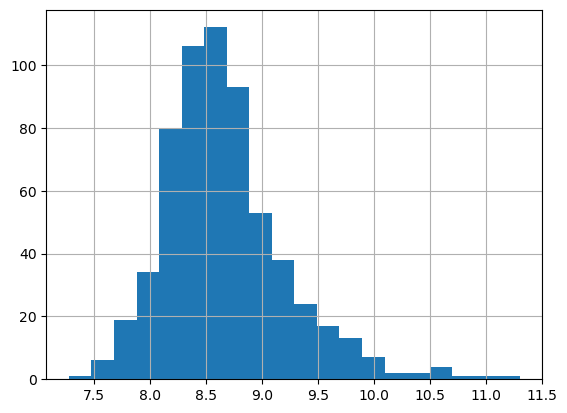

In [16]:
dataset['TotalIncome_log'].hist(bins = 20)

Male      502
Female    112
Name: Gender, dtype: int64


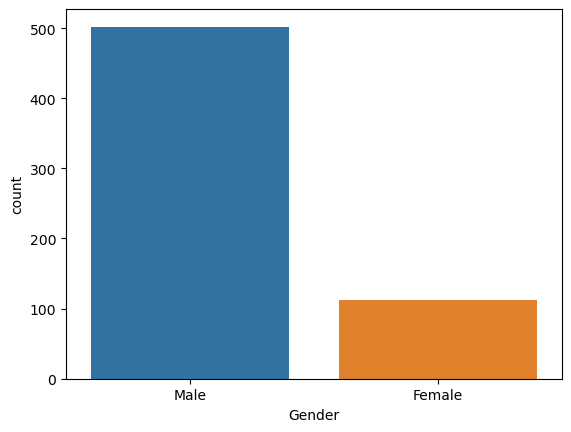

In [17]:
#Comparison by gender
#Males take out more loans than women
sns.countplot(x = 'Gender', data = dataset)
print(dataset['Gender'].value_counts())

Yes    401
No     213
Name: Married, dtype: int64


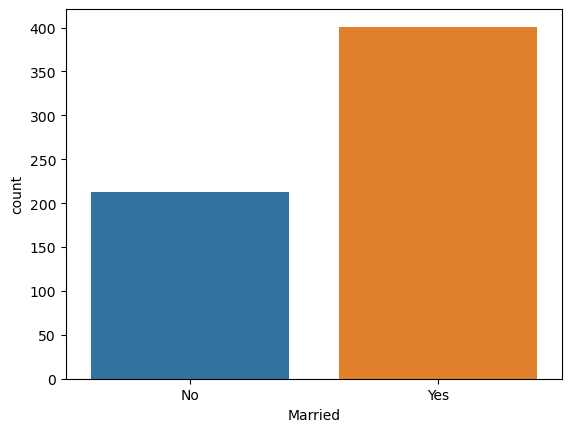

In [18]:
#Comparison by maritol status
#Married people take out more loans
sns.countplot(x = 'Married', data = dataset)
print(dataset['Married'].value_counts())

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


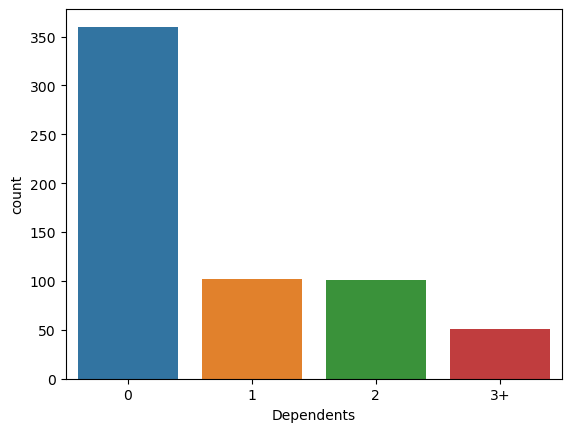

In [19]:
#Comparison by number of dependednts
sns.countplot(x = 'Dependents', data = dataset)
print(dataset['Dependents'].value_counts())

No     532
Yes     82
Name: Self_Employed, dtype: int64


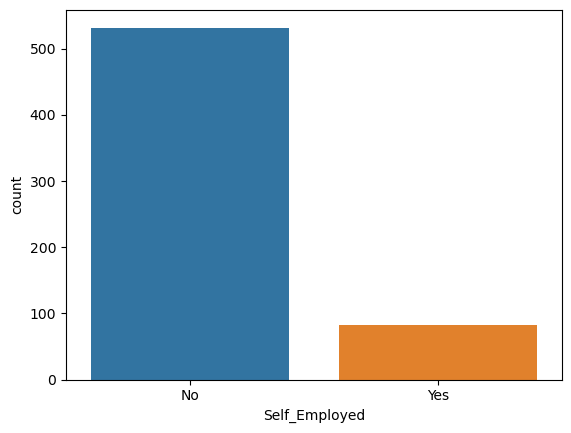

In [48]:
#Comparison by employment
#Individuals that are not self employed take out more loans
sns.countplot(x = 'Self_Employed', data = dataset)
print(dataset['Self_Employed'].value_counts())

1.0    525
0.0     89
Name: Credit_History, dtype: int64


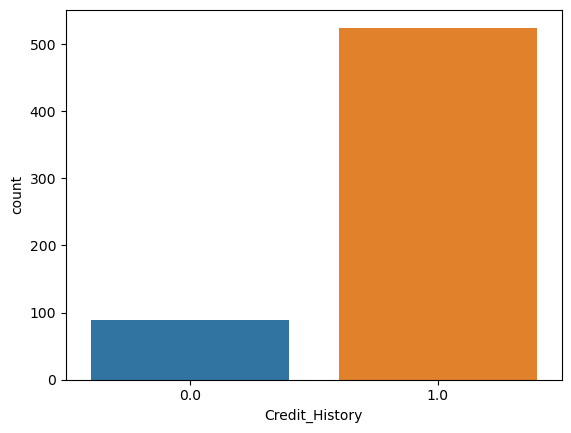

In [53]:
#Comparison by credit history
sns.countplot(x = 'Credit_History', data = dataset)
print(dataset['Credit_History'].value_counts())

# Dependent and Independent Variables

In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
 13  LoanAmount_log     614 non-null    float64
 14  TotalIncome        614 non-null    float64
 15  TotalIncome_log    614 non-null    float64
dtypes: float64(7), int64(1), o

In [21]:
dataset['Dependents_original'] = dataset['Dependents'].copy()

In [22]:
dataset['Dependents'] = dataset['Dependents'].replace('3+', 3)

In [23]:
x = dataset.iloc[:,np.r_[1:5, 9:11, 13:15]].values
y = dataset.iloc[:,12].values
x

array([['Male', 'No', 0, ..., 1.0, 4.857444178729353, 5849.0],
       ['Male', 'Yes', 1, ..., 1.0, 4.852030263919617, 6091.0],
       ['Male', 'Yes', 0, ..., 1.0, 4.189654742026425, 3000.0],
       ...,
       ['Male', 'Yes', 1, ..., 1.0, 5.53338948872752, 8312.0],
       ['Male', 'Yes', 2, ..., 1.0, 5.231108616854587, 7583.0],
       ['Female', 'No', 0, ..., 0.0, 4.890349128221754, 4583.0]],
      dtype=object)

# Splitting dataset into train and test set

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [25]:
print(x_train)

[['Male' 'Yes' 0 ... 1.0 4.875197323201151 5858.0]
 ['Male' 'No' 1 ... 1.0 5.278114659230517 11250.0]
 ['Male' 'Yes' 0 ... 0.0 5.003946305945459 5681.0]
 ...
 ['Male' 'Yes' 3 ... 1.0 5.298317366548036 8334.0]
 ['Male' 'Yes' 0 ... 1.0 5.075173815233827 6033.0]
 ['Female' 'Yes' 0 ... 1.0 5.204006687076795 6486.0]]


# Encoding categorical data 

In [26]:
from sklearn.preprocessing import LabelEncoder
labelencoder_x = LabelEncoder()

In [27]:
for i in range(0, 5):
        x_train[:, i] = labelencoder_x.fit_transform(x_train[:, i])

In [28]:
x_train

array([[1, 1, 0, ..., 1.0, 4.875197323201151, 5858.0],
       [1, 0, 1, ..., 1.0, 5.278114659230517, 11250.0],
       [1, 1, 0, ..., 0.0, 5.003946305945459, 5681.0],
       ...,
       [1, 1, 3, ..., 1.0, 5.298317366548036, 8334.0],
       [1, 1, 0, ..., 1.0, 5.075173815233827, 6033.0],
       [0, 1, 0, ..., 1.0, 5.204006687076795, 6486.0]], dtype=object)

In [29]:
labelencoder_y = LabelEncoder()
y_train = labelencoder_y.fit_transform(y_train)


In [30]:
y_train

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [31]:
for i in range(0, 5):
        x_test[:, i] = labelencoder_x.fit_transform(x_test[:, i])

In [32]:
x_test[:,7] = labelencoder_x.fit_transform(x_test[:,7])

In [33]:
x_test

array([[1, 0, 0, 0, 5, 1.0, 4.430816798843313, 85],
       [0, 0, 0, 0, 5, 1.0, 4.718498871295094, 28],
       [1, 1, 0, 0, 5, 1.0, 5.780743515792329, 104],
       [1, 1, 0, 0, 5, 1.0, 4.700480365792417, 80],
       [1, 1, 2, 0, 5, 1.0, 4.574710978503383, 22],
       [1, 1, 0, 1, 3, 0.0, 5.10594547390058, 70],
       [1, 1, 3, 0, 3, 1.0, 5.056245805348308, 77],
       [1, 0, 0, 0, 5, 1.0, 6.003887067106539, 114],
       [1, 0, 0, 0, 5, 0.0, 4.820281565605037, 53],
       [1, 1, 0, 0, 5, 1.0, 4.852030263919617, 55],
       [0, 0, 0, 0, 5, 1.0, 4.430816798843313, 4],
       [1, 1, 1, 0, 5, 1.0, 4.553876891600541, 2],
       [0, 0, 0, 0, 5, 1.0, 5.634789603169249, 96],
       [1, 1, 2, 0, 5, 1.0, 5.4638318050256105, 97],
       [1, 1, 0, 0, 5, 1.0, 4.564348191467836, 117],
       [1, 1, 1, 0, 5, 1.0, 4.204692619390966, 22],
       [1, 0, 1, 1, 5, 1.0, 5.247024072160486, 32],
       [1, 0, 0, 1, 5, 1.0, 4.882801922586371, 25],
       [0, 0, 0, 0, 5, 1.0, 4.532599493153256, 1],
       [1, 1

In [34]:
labelencoder_y = LabelEncoder()
y_test = labelencoder_y.fit_transform(y_test)

# Scaling the data

In [35]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)

In [36]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [37]:
y_pred = dtc.predict(x_test)
y_pred

array([0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0])

In [38]:
from sklearn import metrics
accuracy_dtc = metrics.accuracy_score(y_pred,y_test)
print('The accuracy of the decision tree is: ', metrics.accuracy_score(y_pred,y_test))

The accuracy of the decision tree is:  0.6260162601626016


In [39]:
from sklearn.naive_bayes import GaussianNB
nbc  = GaussianNB()
nbc.fit(x_train, y_train)

GaussianNB()

In [40]:
y_pred = nbc.predict(x_test)
accuracy_nbc = metrics.accuracy_score(y_pred,y_test)
print('The accuracy of the Naive Bayes is: ', metrics.accuracy_score(y_pred,y_test))

The accuracy of the Naive Bayes is:  0.8292682926829268


In [41]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
svc = SVC()
svc.fit(x_train, y_train)

SVC()

In [42]:
y_pred = svc.predict(x_test)

accuracy_svm = accuracy_score(y_test, y_pred)
print('The accuracy of the SVM is:', accuracy_score(y_test, y_pred))

The accuracy of the SVM is: 0.8292682926829268


In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

y_pred_rf = rfc.predict(x_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print('The accuracy of the Random Forest classifier is:', accuracy_rf)

The accuracy of the Random Forest classifier is: 0.6097560975609756


In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

knnc = KNeighborsClassifier()
knnc.fit(x_train, y_train)

# Predict using the trained model
y_pred_knn = knnc.predict(x_test)

# Calculate and print the accuracy for KNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print('The accuracy of the K-Nearest Neighbors (KNN) classifier is:', accuracy_knn)


The accuracy of the K-Nearest Neighbors (KNN) classifier is: 0.8048780487804879


C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

lgc = LogisticRegression()
lgc.fit(x_train, y_train)

# Predict using the trained model
y_pred_logreg = lgc.predict(x_test)

# Calculate and print the accuracy for Logistic Regression
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print('The accuracy of Logistic Regression is:', accuracy_logreg)

The accuracy of Logistic Regression is: 0.8292682926829268


In [46]:
comparison = pd.DataFrame({'Model': ['Logistic Regression', 'K Neighbors', 
                                  'SVM', 'Gaussian NB', 'Decision Tree', 
                                  'Random Forest'], 
                        'Accuracy': [accuracy_logreg*100, accuracy_knn*100, accuracy_svm*100, 
                                     accuracy_rf*100, accuracy_nbc*100, accuracy_dtc*100 ]})
comparison.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
0,Logistic Regression,82.926829
2,SVM,82.926829
4,Decision Tree,82.926829
1,K Neighbors,80.487805
5,Random Forest,62.601626
3,Gaussian NB,60.975610
